In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

C:\Users\Rohit Gopalakrishnan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Rohit Gopalakrishnan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Rohit Gopalakrishnan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Rohit Gopalakrishnan\anaconda3\lib\site-packages\ten

# Model Creation

In [6]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [7]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [8]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

# Model Training

In [ ]:
# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('./Weights/Meso4_DF')

In [ ]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # set validation split

# Instantiating generator to feed images through the network
train_generator = train_datagen.flow_from_directory(
    './Dataset/',
    target_size=(256, 256),
    batch_size=50,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    './Dataset/', # same directory as training data
    target_size=(256, 256),
    batch_size=50,
    class_mode='binary',
    subset='validation') # set as validation data

In [ ]:
# Checking class assignment
train_generator.class_indices

In [ ]:
hist = meso.model.fit_generator(
    train_generator,
    steps_per_epoch = 200,
    epochs = 4,
    validation_data = validation_generator,
    validation_steps = 50
)

In [ ]:
meso.model.save("Models/dummy_model.h5")

# Model Evaluation

In [2]:
model = load_model('Models/deepfake_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    './Dataset/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 12353 images belonging to 2 classes.


(1, 256, 256, 3)
Predicted likelihood: 0.4917
Actual label: 1

Correct prediction: False


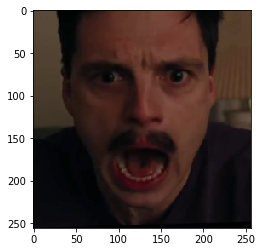

In [10]:
meso = Meso4()
# Rendering image X with label y for MesoNet
X, y = generator.next()
print(X.shape)

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [11]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [12]:
def calMet1(a, b, c, d):
    return ((a+b) / (a+b+c+d)) * 100
def calMet2(a, b):
    return (a / (a+b)) * 100

In [13]:
#Previous predictions
tr = 3747
td = 2563
fr = 281
fd = 513

#Graph points for evaluation metrics
accList = []
accList.append(calMet1(tr, td, fr, fd))

errList = []
errList.append(calMet1(fr, fd, tr, td))

preRList = []
preRList.append(calMet2(tr, fr))

preDList = []
preDList.append(calMet2(td, fd))

recRList = []
recRList.append(calMet2(tr, fd))

recDList = []
recDList.append(calMet2(td, fr))

#List for confusion matrix
y_pred = []
y_act = []

In [14]:
# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
        tr = tr + 1
        y_pred.append(1)
        y_act.append(1)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
        td = td + 1
        y_pred.append(0)
        y_act.append(0)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
        fd = fd + 1
        y_pred.append(0)
        y_act.append(1)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        fr = fr + 1
        y_pred.append(1)
        y_act.append(0)
        
    accList.append(calMet1(tr, td, fr, fd))
    errList.append(calMet1(fr, fd, tr, td))
    preRList.append(calMet2(tr, fr))
    preDList.append(calMet2(td, fd))
    recRList.append(calMet2(tr, fd))
    recDList.append(calMet2(td, fr))
    
    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")
        
        

0  predictions completed.
1000  predictions completed.
2000  predictions completed.
3000  predictions completed.
4000  predictions completed.
5000  predictions completed.
6000  predictions completed.
7000  predictions completed.
8000  predictions completed.
9000  predictions completed.
10000  predictions completed.
11000  predictions completed.
12000  predictions completed.
All 12353 predictions completed


In [15]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

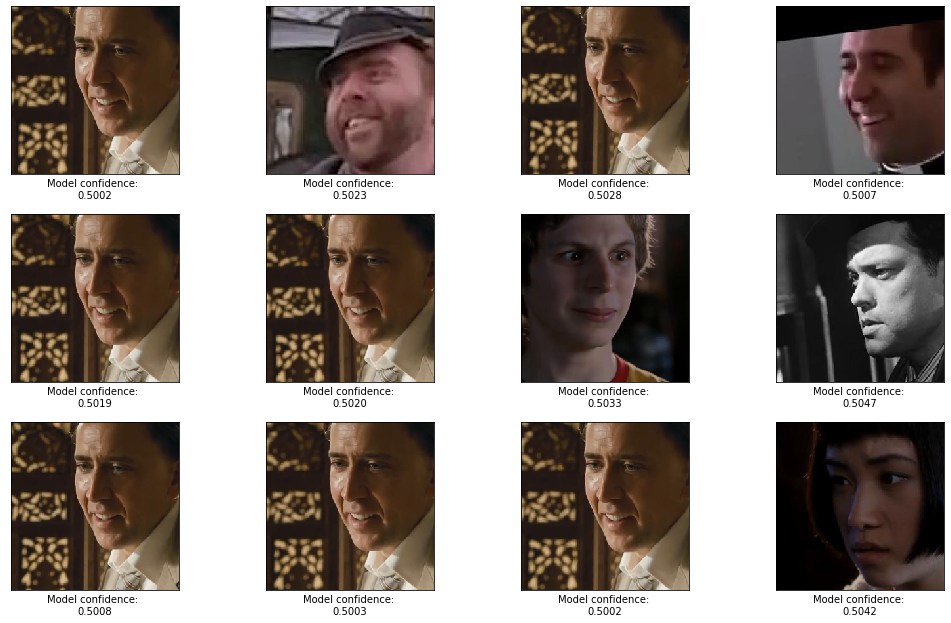

In [16]:
plotter(correct_real, correct_real_pred)

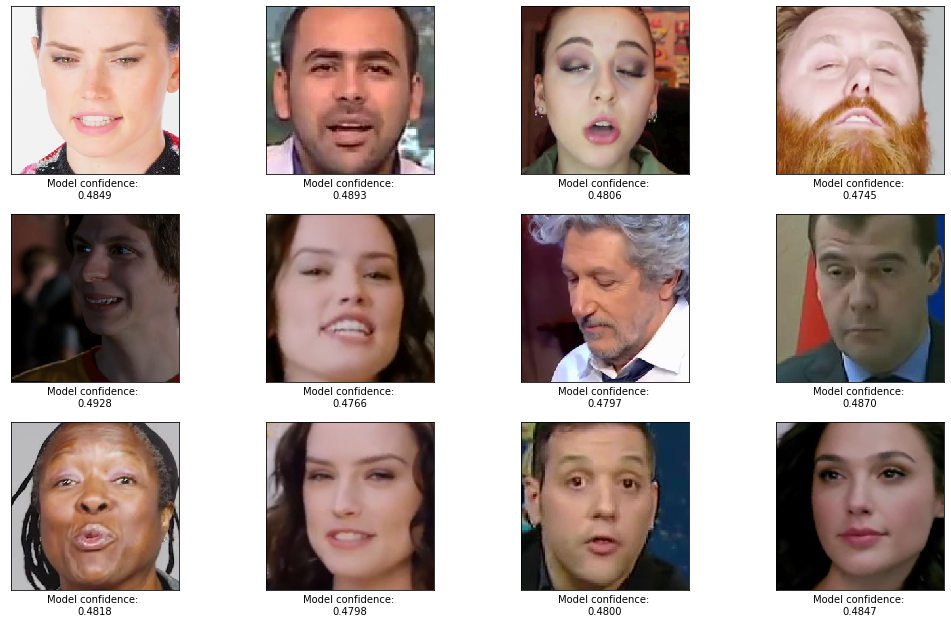

In [17]:
plotter(misclassified_real, misclassified_real_pred)

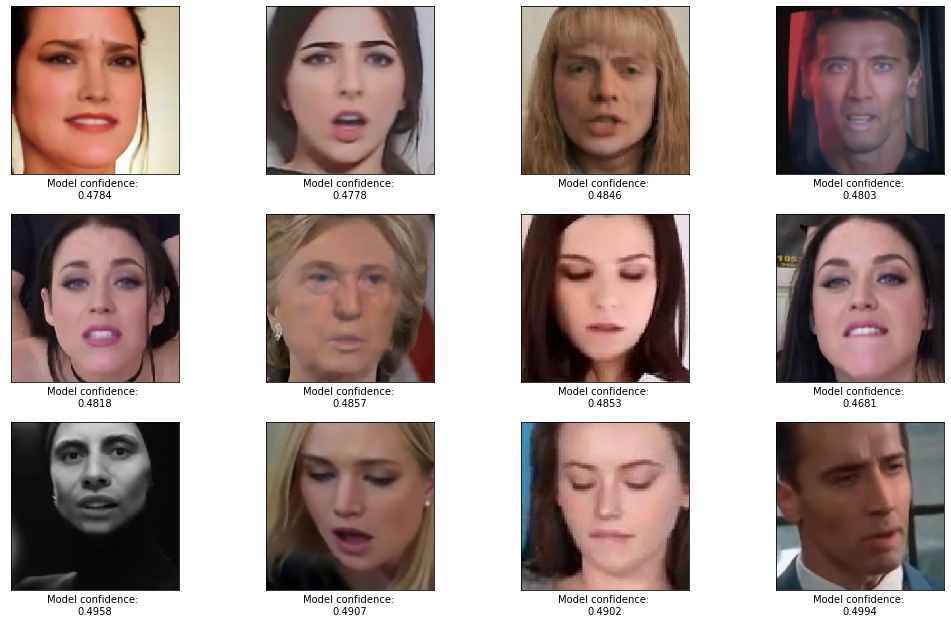

In [18]:
plotter(correct_deepfake, correct_deepfake_pred)

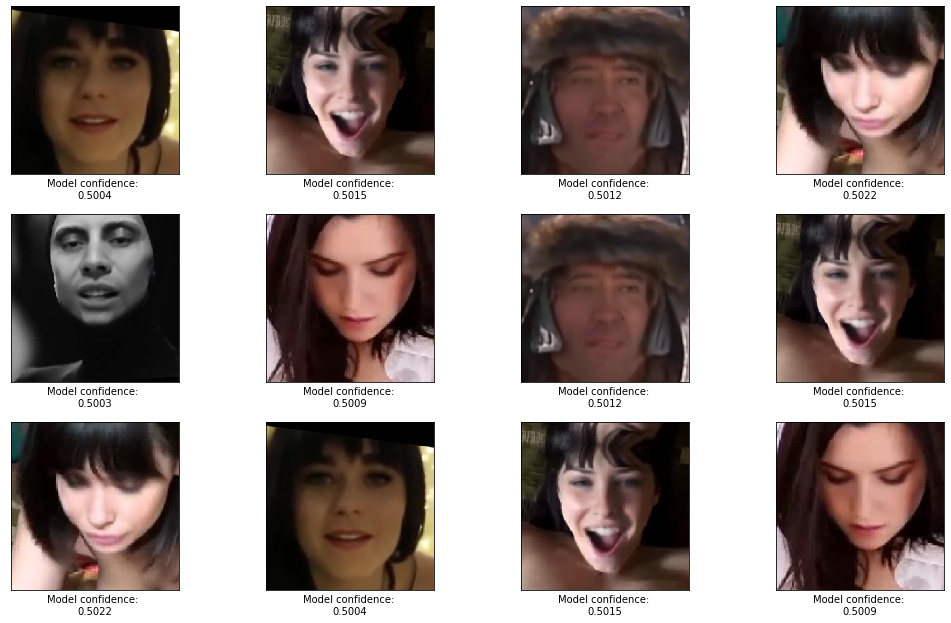

In [19]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)

In [20]:
correct = len(correct_real)+len(correct_deepfake)
misclassified = len(misclassified_real) + len(misclassified_deepfake)
accuracy = correct/(correct+misclassified)
print("Accuracy: "+str(accuracy))

Accuracy: 0.4138266008257104


In [21]:
# Evaluation

precisionReal = len(correct_real)/ (len(correct_real)+len(misclassified_deepfake))
precisionDF = len(correct_deepfake)/ (len(correct_deepfake)+len(misclassified_real))
print("Binary Precision\nPrecision Real: "+ str(precisionReal) +"\nPrecision DF: "+ str(precisionDF)+"\n")

recallReal = len(correct_real) / (len(correct_real) + len(misclassified_real))
recallDF = len(correct_deepfake) / (len(correct_deepfake) + len(misclassified_deepfake))
print("\nRecall:\nRecall Real:" + str(recallReal) +"\nRecall DF: " + str(recallDF))

f1_scoreReal = (2 * precisionReal * recallReal) / (precisionReal + recallReal)
print("\nF1 score Real: "+str(f1_scoreReal))
f1_scoreDF = (2 * precisionDF * recallDF) / (precisionDF + recallDF)
print("\nF1 score DF: "+str(f1_scoreDF))

Binary Precision
Precision Real: 0.6216216216216216
Precision DF: 0.41320233842156545


Recall:
Recall Real:0.003172413793103448
Recall DF: 0.9972565157750343

F1 score Real: 0.006312611499931385

F1 score DF: 0.5843044950915668


In [22]:
%matplotlib inline

In [23]:
x_plot = range(7104, 7104 + len(accList))

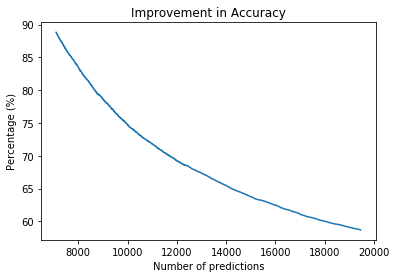

In [24]:
plt.plot(x_plot, accList, label = "Accuracy")
plt.title("Improvement in Accuracy")
plt.xlabel("Number of predictions")
plt.ylabel("Percentage (%)")
plt.show()

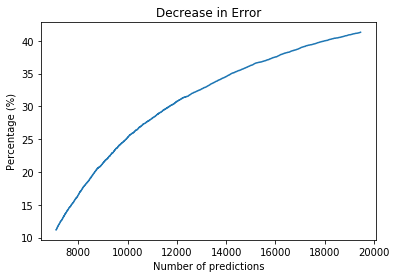

In [25]:
plt.plot(x_plot, errList, label = "Error")
plt.title("Decrease in Error")
plt.xlabel("Number of predictions")
plt.ylabel("Percentage (%)")
plt.show()

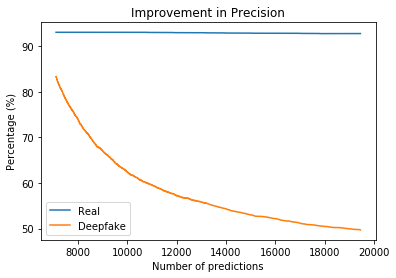

In [26]:
plt.plot(x_plot, preRList, label = "Real")
plt.plot(x_plot, preDList, label = "Deepfake")
plt.title("Improvement in Precision")
plt.xlabel("Number of predictions")
plt.ylabel("Percentage (%)")
plt.legend()
plt.show()

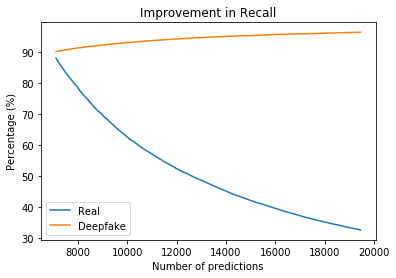

In [27]:
plt.plot(x_plot, recRList, label = "Real")
plt.plot(x_plot, recDList, label = "Deepfake")
plt.title("Improvement in Recall")
plt.xlabel("Number of predictions")
plt.ylabel("Percentage (%)")
plt.legend()
plt.show()

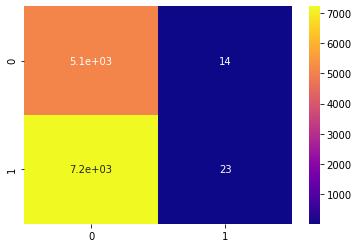

In [28]:
cm = confusion_matrix(y_act, y_pred)
sns.heatmap(cm, cmap = "plasma", annot = True)

In [29]:
from sklearn.metrics import classification_report

In [30]:
classification_report(y_act, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.41      1.00      0.58      5103\n           1       0.62      0.00      0.01      7250\n\n    accuracy                           0.41     12353\n   macro avg       0.52      0.50      0.30     12353\nweighted avg       0.54      0.41      0.25     12353\n'